<a href="https://colab.research.google.com/github/VTNay/Boson-Einstein-Condensate/blob/main/GPE_1D_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programme pour l'équation de Gross - Pitaevskii dépendant du temps**

Ici, nous développons des algorithmes numériques simples pour les solutions stationnaires et non stationnaires de l'équation de Gross-Pitaevskii (GP) dépendant du temps décrivant les propriétés de Bose-Einstein condensation . En particulier, nous considérons des algorithmes impliquant une propagation en temps réel et en temps imaginaire basés sur une méthode de "Splitting Spectrum algorithms" Dans une forme à une variable spatiale de l'équation GP, ​​nous considérons les pièges d'oscillateur harmonique unidimensionnel . Dans ce cas, nous étudions l'évolution des solitons étant au sein d'un piège harmonique . 


##**I. Introduction**

Bose-Einstein condensation (BEC) est un état de la matière d'un gaz dilué de bosons qui ont
refroidi à très basse température (presque le zéro absolu). Dans cet état, un grand nombre de
les bosons occupent l'état quantique le plus bas et commencent à se comporter comme un système quantique macroscopique.
Ces systèmes permettent aux chercheurs de sonder de nombreuses propriétés fondamentales de la mécanique quantique.

Ici, on developpe un algorithme numérique simple pour les solutions stationnaires et non stationnaires de équation Gross-Pitaevskii (GPE) décrivant les propriétés de Bose-Einstein condensation en une température extrêmement basse. 

##**II. Équation de Gross Pitaevskii**

À température nulle, la fonction d'onde de condensat de Bose-Einstein dépendante du temps $\Psi \equiv \Psi(\mathbf{r}; \tau)$ à la position $\mathbf{r}$ et au temps $\tau$ peut être décrite par l'équation GP non linéaire à champ moyen suivante:
$$
\mathrm{i} \hbar \frac{\partial \Psi(\mathbf{r} ; \tau)}{\partial \tau}=\left[-\frac{\hbar^2 \nabla^2}{2 m}+V(\mathbf{r})+g N|\Psi(\mathbf{r} ; \tau)|^2\right] \Psi(\mathbf{r} ; \tau)  \quad(2.1)
$$
Ici $m$ est la masse d'un atome et $N$ le nombre d'atomes dans le condensat, $g=4 \pi \hbar^2 a / m$ la force de l'interaction inter-atomique, avec $a$ la valeur atomique longueur de diffusion. La condition de normalisation de la fonction d'onde est $\int d \mathbf{r}|\Psi(\mathbf{r} ; \tau)|^2=1$.


###**2.1. GPE anisotrope en $3 D$**

Le potentiel de piège tridimensionnel est donné par $V(\mathbf{r})=\frac{1}{2} m \omega^2\left(v^2 \bar{x}^2+\kappa^2 \bar{y}^2+\lambda^2 \bar{z}^2\right)$, où $\omega_x \equiv v \omega, \omega_y \equiv \omega \kappa$ et $\omega_z \equiv \omega \lambda$ sont les fréquences angulaires dans les directions $x$, $y$  et $z$, respectivement, et $\mathbf{r} \equiv(\bar{x}, \bar{y} , \bar{z})$ est le vecteur radial. En termes de variables sans dimension $x=\bar{x} / l, y=\bar{y} / l, z=\bar{z} / l, t=\tau \omega, l=\sqrt{\hbar /( m \omega)}$, et $\varphi(x, y, z ; t)=\sqrt{l^3} \Psi(\mathbf{r} ; \tau)$, l'équation GP (2.1) devient:

$$
\left[-\frac{1}{2} \frac{\partial^2}{\partial x^2}-\frac{1}{2} \frac{\partial^2}{\partial y^2 }-\frac{1}{2} \frac{\partial^2}{\partial z^2}+\frac{1}{2}\left(v^2 x^2+\kappa^2 y^ 2+\lambda^2 z^2\right)+\mathcal{N}|\varphi(x, y, z ; t)|^2-\mathrm{i} \frac{\partial}{\partial t} \right] \varphi(x, y, z ; t)=0   \quad(2.2)
$$

avec $\mathcal{N} = 4 \pi a N / l$ et la normalisation
$$
\int_{-\infty}^{\infty} d x \int_{-\infty}^{\infty} d y \int_{-\infty}^{\infty} d z|\varphi(x, y, z ; t)|^2=1
$$

Maintenant, avec la mise à l'échelle $t \rightarrow 2 t$, Eq. (2.2) peut être réécrit comme

$$
\left[-\frac{\partial^2}{\partial x^2}-\frac{\partial^2}{\partial y^2}-\frac{\partial^2}{\partial z^2 }+\left(v^2 x^2+\kappa^2 y^2+\lambda^2 z^2\right)+\mathcal{N}|\varphi(x, y, z ; t)|^ 2-\mathrm{i} \frac{\partial}{\partial t}\right] \varphi(x, y, z ; t)=0    \quad(2.3)
$$

avec $\mathcal{N}=8 \pi a N / l$. Les conditions aux limites pour la solution sont $\lim _{x \rightarrow \pm \infty} \varphi(x, y, z ; t)=0,$$ \lim _{y \rightarrow \pm \infty} \varphi(x, y, z ; t)=0, \lim _{z \rightarrow \pm \infty} \varphi(x, y, z ; t)=$ 0.
 
###**2.2. GPE en 1D**  

Dans le cas d'un piège allongé en forme de cigare, l'équation (2.3) se réduit à une forme quasi unidimensionnelle. Ceci est réalisé en supposant que le système reste confiné à l'état fondamental dans la direction transversale. Dans ce cas, la fonction d'onde de l'équation (2.3) peut s'écrire $\varphi(x, y, z ; t)=\tilde{\varphi}(x ; t) \phi_0(y) \phi_0(z) \exp [-\mathrm{i} (\lambda+\kappa) t / 2]$ avec $\phi_0(y)=[\kappa /(2 \pi)]^{1 / 4} \exp \left(-\kappa y^2 / 4\right )$ et $\phi_0(z)=[\lambda /(2 \pi)]^{1 / 4} \exp \left(-\lambda z^2 / 4\right)$ les fonctions d'onde de l'état fondamental respectives dans $y$ - et $z$-directions. En utilisant cette transformation dans équation (2.3), en multipliant par $\phi_0(y) \phi_0(z)$, en intégrant sur $y$ et $z$, en supprimant le tilde sur $\varphi$, on obtient:

$$
\left[-\frac{\partial^2}{\partial x^2}+v^2 x^2+\mathcal{N}|\varphi(x ; t)|^2-\mathrm{i} \frac{\partial}{\partial t}\right] \varphi(x ; t)=0  \quad(2.4)
$$

avec $\mathcal{N}=4 a N \sqrt{\lambda \kappa} / l$ et la  normalization $ \int_{-\infty}^{\infty} dx |\varphi(x; t)|^2=1$. Pour la solution numérique, on prend $\lim _{x \rightarrow \pm \infty} \varphi(x ; t)= 0$

Notons $w = v^2$ \~ $\omega_{x}^2$, on obient:

$$
\left[-\frac{\partial^2}{\partial x^2}+w x^2+\mathcal{N}|\varphi(x ; t)|^2-\mathrm{i} \frac{\partial}{\partial t}\right] \varphi(x ; t)=0  \quad(2.5)
$$


##**III.Soliton solution**

La non-linéarité inhérente des BEC dilués signifie qu'ils soutiennent une famille d'excitations non linéaires appelées solitons. Ces structures sont des paquets d'ondes unidimensionnels localisés qui se propagent sans dispersion, grâce à une équilibre entre la tendance naturelle d'une onde à se disperser et la non-linéarité au sein du médium. De plus, les solitons se déplacent à vitesse finie et constante dans un système homogène, et sortent inchangés des collisions. Bien que un soliton prend techniquement la forme d'une onde solitaire lorsqu'il est intégré dans un système tridimensionnel, nous désignerons généralement les deux formes comme un soliton. 

Un soliton est strictement une solution à un système homogène, c'est-à-dire le GPE 1D avec $V_{ext}$ = 0, et donc, même dans la limite 1D, devrait devenir dynamiquement instable lorsque la densité longitudinale est inhomogène. Les ondes solitaires deviennet les formes bright ou dark selon que le support est effectivement attractif/concentrant ou répulsif/défocalisant, respectivement. C'est à dire le bright soliton est la solution fondamentale de l'équation (2.1) avec $V(\mathbf{r}) = 0$ et $g$ est positif, et le dark soliton correspond à le cas où $g$ est négatif 

 Étant donné qu'une densité de fond inhomogène est une caractéristique générale des BEC dilués (en raison de la potentiel de piégeage utilisé pour confiner le gaz), le mouvement des solitons à travers une densité inhomogène est une considération importante. Dans la limite de température nulle, un soliton dans un système 1D sous harmonique on s'attend à ce que le confinement oscille d'avant en arrière dans le piège. En faisant varier la fréquence du potentiel harmonique on vérifie que le soliton oscille avec une fréquence proportionnelle à celle du potentiel harmonique. Spécifiquement, $\omega_{soliton} = \omega_{potentiel}/\sqrt{2}$. 

##**IV. Méthode numérique**
###**II.1 Méthode "Split-step spectrum" pour GPE dans l'espace d'un variable**
Le GPE dans le cas unidimentionnel peut être exprimée sous la forme suivante :
$$
\mathrm{i} \frac{\partial}{\partial t} \varphi(x ; t)=\left[-\frac{\partial^2}{\partial x^2}+ w x^2+\mathcal{N}|\varphi(x ; t)|^2\right] \varphi(x ; t) \equiv H \varphi(x ; t) \quad(4.1)
$$
où l'hamiltonien $H$ contient les différents termes linéaires et non linéaires incluant la dérivée spatiale.  Nous résolvons cette équation par itération temporelle. Une solution d'entrée d'essai donnée est propagée dans le temps sur de petits pas de temps jusqu'à ce qu'une solution finale stable soit atteinte. Le GPE est discrétisée dans l'espace et dans le temps en utilisant le schéma aux différences finies. Cette procédure aboutit à un ensemble d'équations algébriques qui peuvent être résolues par itération temporelle en utilisant une solution d'entrée cohérente avec la condition aux limites connue. Dans la présente méthode à étapes fractionnées, cette itération est commodément effectuée en quelques étapes en divisant l'hamiltonien complet en différentes parties dérivées et non dérivées.

####**II.1.1 Propagation dans temps réel**

L'itération temporelle est effectuée en divisant $H$ en deux parties : $H=H_1+H_2$, avec

$$
\begin{aligned}
& H_1=\left[ w x^2+\mathcal{N}|\varphi(x ; t)|^2\right]\quad  (4.2)  \\
& H_2=-\frac{\partial^2}{\partial x^2} \quad(4.3)
\end{aligned}
$$
Essentiellement, nous divisons l'équation (4.1) en
$$
\begin{aligned}
\mathrm{i} \frac{\partial}{\partial t} \varphi(x ; t) & =\left[ w x^2+\mathcal{N}|\varphi(x ; t)|^2\right] \varphi(x ; t) \equiv H_1 \varphi(x ; t) \quad(4.4) \\
\mathrm{i} \frac{\partial}{\partial t} \varphi(x ; t) & =-\frac{\partial^2}{\partial x^2} \varphi(x ; t) \equiv H_2 \varphi(x ; t) \quad(4.5)
\end{aligned}
$$
On résout d'abord l'équation (4.4) avec une valeur initiale $\varphi\left(x ; t_0\right)$ à $t=t_0$ pour obtenir une solution intermédiaire à $t=t_0+\Delta$, où $\Delta$ est le pas de temps. Ensuite, cette solution intermédiaire est utilisée comme valeur initiale pour résoudre l'équation (4.5) donnant la solution finale à $t=t_0+\Delta$ comme $\varphi\left(x ; t_0+\Delta\right)$. Cette procédure est répétée $n$ fois pour obtenir la solution finale à un instant donné $t_{\text {final }}=t_0+n \Delta$.

La variable de temps est discrétisée en $t_n=n \Delta$ où $\Delta$ est le pas de temps. La solution est d'abord avancée sur le pas de temps $\Delta$ au temps $t_n$ en résolvant l'équation GP (24) avec $H=H_1$ pour produire une solution intermédiaire $\varphi^{n+1 / 2}$ à partir de $\varphi^n$, où $\varphi^n$ est la fonction d'onde discrétisée au temps $t_n$. Comme il n'y a pas de dérivée dans $H_1$, cette propagation est effectuée essentiellement exactement pour les petits $\Delta$ grâce à l'opération
$$
\varphi^{n+1 / 2}=\mathcal{O}_{\text {nd }}\left(H_1\right) \varphi^n \equiv e^{-\mathrm{i} \Delta H_1} \varphi^n \quad(4.6)
$$
où $\mathcal{O}_{\text {nd }}\left(H_1\right)$ désigne une opération d'évolution temporelle avec $H_1$ et le suffixe 'nd' désigne une non-dérivée. Ensuite nous effectuons numériquement la propagation temporelle correspondant à l'opérateur $\mathrm{H}_2$ par la méthode du spectre (comme dans le TD3).

On note: $\varphi^{n+1}=\mathcal{O}_{\mathrm{s}}\left(H_2\right) \varphi^{n+1 / 2} \quad(4.7)$

qui combiné avec l'équation (4.6) obtient: $\varphi^{n+1}=\mathcal{O}_{\mathrm{s}}\left(H_2\right) \mathcal{O}_{\text {nd }}\left(H_1\right) \varphi^n \quad(4.8)$ 

où $\mathcal{O}_{\mathrm{s}}$ désigne une opération d'évolution temporelle avec $\mathrm{H}_2$ et le suffixe 'CN' fait référence à l'algorithme de la méthode du spectre. L'opération $\mathcal{O}_{\mathrm{s}}$ permet de propager la solution intermédiaire $\varphi^{n+1 / 2}$ par pas de temps $\Delta$ pour générer la solution $\varphi^ {n+1}$ au pas de temps suivant $t_{n+1}=(n+1) \Delta$.

####**II.1.1 Propagation dans temps imaginaire**

Bien que la propagation en temps réel telle que décrite ci-dessus présente de nombreux avantages, dans cette approche, on doit traiter des variables complexes pour une fonction d'onde complexe pour des états non stationnaires. Pour l'état fondamental stationnaire, la fonction d'onde est essentiellement en temps réel et la méthode de propagation en temps imaginaire traitant des variables réelles semble être pratique. Dans cette approche, le temps $t$ est remplacé par une quantité imaginaire $t=-\mathrm{i} t$ et l'équation (4.1) devient maintenant
$$
-\frac{\partial}{\partial \bar{t}} \varphi(x ; \bar{t})=\left[-\frac{\partial^2}{\partial x^2}+ w x^2 +\mathcal{N}|\varphi(x ; \bar{t})|^2\right] \varphi(x ; \bar{t}) \equiv H \varphi(x ; \bar{t}) \quad(4.9)
$$
Dans cette équation, $\bar{t}$ n'est qu'un paramètre mathématique.

De l'équation (4.1) on voit qu'un état propre $\varphi_i$ de valeur propre $E_i$ de $H$ satisfaisant $H \varphi_i=E_i \varphi_i$ se comporte sous propagation en temps imaginaire comme $\partial \varphi_i(\bar{t}) / \partial \bar{t}=-E_i \varphi_i(\bar{t})$, de sorte que $\varphi_i(\bar{t})=\exp \left(-E_i \bar{t}\right) \varphi_i(0)$. Par conséquent, si nous commençons avec un initial arbitraire $\varphi(x ; \bar{t})$ qui peut être considéré comme une combinaison linéaire de toutes les fonctions propres de $H$, alors lors de la propagation en temps imaginaire, toutes les fonctions propres décroîtront de manière exponentielle avec le temps. Cependant, tous les états excités avec un $E_i$ plus grand décroîtront exponentiellement plus rapidement par rapport à l'état fondamental avec la plus petite valeur propre. Par conséquent, après un certain temps, seul l'état fondamental survit. Comme tous les états décroissent avec le temps pendant la propagation en temps imaginaire, nous devons multiplier la fonction d'onde par un nombre supérieur à l'unité pour préserver sa normalisation afin que la solution ne tende pas vers zéro.

Ce programme est pour but de résoudre la GPE: 

   $$
 \frac{\partial}{\partial t} \varphi(x ; t)= R \left[-\frac{\partial^2}{\partial x^2}+wx^2+\mathcal{N}|\varphi(x ; t)|^2\right] \varphi(x ; t) \equiv H \varphi(x ; t)
$$
où $w$ est un nombre réelle et proportionnel à la fréquence du potentiel harmonique, R est un paramètre déterminant la méthode qu'on utilise:

+ R = -$\mathrm{i}$ : méthode de temps réel; 
+ R = -1: méthode de temps imaginaire

Ici on utilise la méthode "Split-step", c'est à dire on sépare H en deux parties $H = H_{1} + H_{2}$
$$
H_{1} = R \left[wx^2+\mathcal{N}|\varphi(x ; t)|^2\right]
\\
H_{2} = R \left[-\frac{\partial^2}{\partial x^2}\right]
$$
On résout $\frac{\partial}{\partial t} \varphi(x ; t)= H_{1}\varphi(x ; t)$ en gardant $H_{1} $ est une constante et puis $\frac{\partial}{\partial t} \varphi(x ; t)= H_{2}\varphi(x ; t)$ par la méthode de spectrale

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy import signal
from scipy.interpolate import UnivariateSpline

class GPE1D:
    """A class that solves  du/dt = R* [- d^2(u)/(dt)^2 + [w*x^2/4 + N.u^2]*u]
    Spectral stepping method for solving PDEs"""
    def __init__(self, Nx, N, L,w,r = 1): 
        """Initialize the spatial and spectral grids
        If r = 1: method real time, if r = 0: method imaginary time"""
        self.Nx = Nx
        self.N = N
        self.L = L
        self.w = w
        self.x, self.dx = np.linspace(-self.L, self.L, self.Nx, retstep=True)
        self.k = 2*np.pi*np.fft.fftfreq(self.Nx, d=self.dx)        
        if r == 0:
            self.R = -1
        else:   
            self.R = -1j
        self.u = np.zeros(Nx,dtype = complex)

        
    def initialize(self, func):
        """Set the initial condition"""
        self.u = func(self.x)
        self.u = self.u/np.sqrt(np.linalg.norm(self.u)**2*self.dx)

        
    def initialize_vector(self,u):
        "set the initial condition by a vector u"
        self.u = u
        self.u = self.u/np.sqrt(np.linalg.norm(self.u)**2*self.dx)

    
    def FourierStep(self, dt):
        """Make a step dt forward in time for du/dt = -R*d^2(u)/dt^2"""
        uk = np.fft.fft(self.u)
        uk = np.exp(self.k**2 * dt*self.R)*uk
        self.u = np.fft.ifft(uk)
    
    def step(self,dt):
        """Make a step dt forward in time for i*du/dt = H.u"""
        self.FourierStep(dt)
        self.H1Step(dt)
        if self.R == -1:  #normalisation for imaginary time method
            self.u = self.u/np.sqrt(np.linalg.norm(self.u)**2*self.dx)

    def H1Step(self,dt): 
        """Make a step dt forward in time for i*du/dt = (w*x^2/4 + N.u^2)*u"""
        self.u = self.u * np.exp(self.R*(self.w*self.x**2 + self.N * abs(self.u)**2) * dt)
        
'''        
    def H1Step(self,dt):  #methode runga kutta ordre 4
        """Make a step dt forward in time for du/dt = R*[w*x^2/4 + N.u^2]*u"""
        
        if self.R == -1j:
            k1,k2,k3,k4 = np.zeros((4,self.Nx),dtype = complex)
        else:
            k1,k2,k3,k4 = np.zeros((4,self.Nx),dtype = float)
            
        N,w,R,x,u = self.N,self.w,self.R,self.x,self.u
        k1 = R*(w*x**2/4 + N * abs(u)**2)*dt* u
        k2 = R*(w*x**2/4 + N * abs(u+k1/2)**2)*dt* (u+k1/2)
        k3 = R*(w*x**2/4 + N * abs(u+k2/2)**2)*dt* (u+k2/2)
        k4 = R*(w*x**2/4 + N * abs(u+k3)**2)*dt* (u+k3)
        self.u += k1/6 + k2/3 + k3/3 + k4/6 
'''


def advance(GPE, dt, Nt): #Advance GPE Nt pas d'intervalle dt
    for _ in range(Nt):
        GPE.step(dt)

Nous allons d'abord procéder à des tests de l'algorithme de résolution implémenté, à partir de problèmes dont les solutions analytiques sont accessibles.

Nous commençons par étudier l'étalement du paquet d'onde gaussien lors de sa propagation. L'équation décrivant ce phénomène est la suivante : $$\frac{\partial}{\partial t} \varphi(x ; t)=\left[-\frac{\partial^2}{\partial x^2}\right] \varphi(x; t)$$ 

Elle correspond à notre équation GPE en temps réel pour les paramètres $ \mathcal{N} = 0, \hbar /m =2,  w = 0$

Comme annoncé, nous étudions la propagation d'un paquet d'ondes suivant cette équation : 
$$
\varphi(x, 0)=\frac{1}{\pi^{1 / 4} \sqrt{w_0}} \mathrm{e}^{-\frac{(x-x_0)^2}{2 w_0^2}} \mathrm{e}^{i k_0 (x-x_0)}
$$

Après un temps t, en utilisant la transformation de Fourier, on obtient :

$$
\varphi(x, t)=\frac{\sqrt{w_0}}{\pi^{1 / 4} w(t)} \mathrm{e}^{-\frac{\left(x-x_0-k_0 t\right)^2}{2 w(t)^2}} \mathrm{e}^{i k_0\left(x-x_0-v_{\varphi} t\right)}
$$

où $v_{\varphi} = -k_0$ est la vitesse de groupe

La probabilité de présence $|\varphi(x, t)|^2$ vaut donc :
$$
|\varphi(x, t)|^2=\frac{w_0}{\pi^{1 / 2} w(t)^2} \mathrm{e}^{-\frac{(x-x_0-k_0t)^2}{|w(t)|^2}}
$$

et l'étalement du paquet gaussien est donné par l'expression :
$$
{\left|w(t)^2\right|}= w_0^2 \left(1+4\frac{ t^2}{w_0^4}\right)
$$

Nous allons maintenant vérifier qu'une implémentation numérique à partir de GPE1D permet de retrouver ce résultat.

In [ ]:
##We start by creating a class that allows to compute the initial gaussian packet and the analytical solution at time T.

class Gaussian_packet:
    """Gaussian function"""
    def __init__(self, w0, k0, x0):
        """Create Gaussian with the given width and amplitude, centered at x = x0"""
        self.w0 = w0
        self.k0 = k0
        self.x0 = x0
        
    def __call__(self, x):
        """Evaluate the function for the values of x"""
        return np.exp(-(x-self.x0)**2 /(2*self.w0**2) + self.k0*1j*(x-x0)) / (np.pi**0.25*np.sqrt(self.w0))
    
class Solution_at_T:
    def __init__(self, w0, k0, x0,T):
        """Create Gaussian with the given width and amplitude, centered at x = x0"""
        self.w0 = w0
        self.k0 = k0
        self.x0 = x0
        self.T = T
        
    def __call__(self, x):
        """Evaluate the function for the values of x"""
        k0 = self.k0
        w0 = self.w0
        T = self.T
        x0 = self.x0
        w2 = w0**2*(1+4*T**2/w0**4)
        return np.exp(-(x-x0-2*k0*T)**2/(w2))/(np.sqrt(np.pi)*np.sqrt(w2)) 
    
##We also need a class to obtain the width of the gaussian packet to verify our result
    
class Width2_theo:
    def __init__(self, w0):
        """Create square Gaussian width with the given initial width w0 to calculate w^2 = w0^2 (1+4*t^2/w0^4) """
        self.w0 = w0
    def __call__(self,t):
        return self.w0**2*(1+4*t**2/self.w0**4)
    
def FWHM(X,Y): 
    "Find half width of Y(X)"
    half_max = max(Y) / 2.
    for i in range(len(Y)):
        if Y[i]>half_max:
            left_idx = i
            break
    for i in range(len(Y)):
        if Y[len(Y)-1-i] > half_max:
            right_idx = len(Y)-1-i
            break
    return X[right_idx] - X[left_idx]  #return the difference (full width)

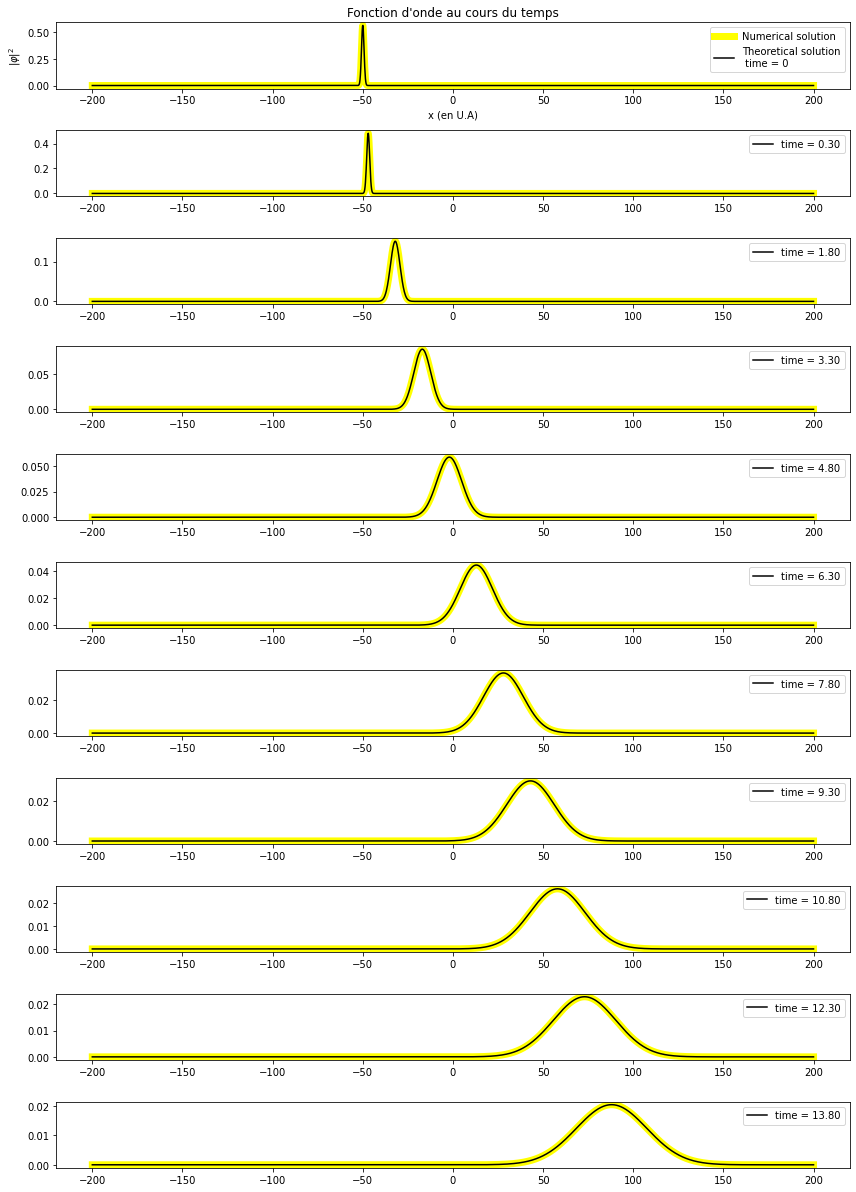

In [ ]:
#Test for w = 0, N = 0, R = 0: étalement d'onde gaussienne

w = 0           # Valeur de w dans l'equation
N = 0        # Valeur de N dans l'equation
Nx = 2000      # Nombre de pas de x
L = 200        # x_max; dx = L/Nx
Nt = 100      # Nombre de pas de temps
dt = 0.003         # Intervalle de temp
dT = dt*Nt          # dT = Nt * dt
NT = 50    #Nombre de pas de T


# create a Gaussian object
w0 = 1
k0 = 5
x0 = -50
gauss = Gaussian_packet(w0,k0,x0)

GPE = GPE1D(Nx,N,L,w) # Create an GPE
GPE.initialize(gauss)
x = GPE.x

T,dT = np.linspace(0,NT*dt*Nt,NT+1,endpoint = True, retstep = True)
width = np.zeros(NT+1) # width caculated
width[0] = w0

fig, ax = plt.subplots((NT)//5+1,figsize=(12, NT/3))
ax[0].plot(x, np.abs(GPE.u)**2,"yellow", linewidth = 7.0,label='Numerical solution')
ax[0].plot(x,abs(gauss(x))**2, "black", label = "Theoretical solution\n time = 0")
ax[0].set_title("Fonction d'onde au cours du temps")
ax[0].set_xlabel('x (en U.A)')
ax[0].set_ylabel(r'$|\varphi|^2$')
ax[0].legend()

# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
for i in range(NT):
    sol = Solution_at_T(w0,k0,x0,T[i+1])
    advance(GPE,dt,Nt)
    width[i+1] = FWHM(x,abs(GPE.u)**2)/(2*np.sqrt(np.log(2)))  # width = FWHM/(2ln2)
    if i%5 == 0:
        ax[i//5+1].plot(x, abs(GPE.u)**2, "yellow", linewidth = 7.0)
        ax[i//5+1].plot(x,sol(x),"black", label = "time = {:.2f}".format(T[i+1]))
        ax[i//5+1].legend()

plt.tight_layout()

La solution numérique coïncide avec la solution analytique, et l'étalement gaussien est visible. Pour conclure, nous vérifions le résultat suivant : 
$${\left|w(t)^2\right|}= w_0^2 \left(1+4\frac{ t^2}{w_0^4}\right)$$

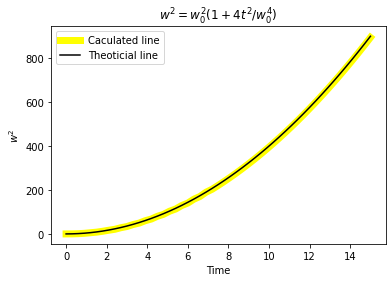

In [ ]:
width2_theo = Width2_theo(w0) 
plt.plot(T,width**2,lw = 7,color = "yellow", label = "Caculated line")
plt.plot(T,width2_theo(T),"black", label = "Theoticial line")
plt.xlabel("Time")
plt.ylabel("$w^2$")
plt.title("$w^2 = w_0^2(1+4t^2/w_0^4)$")
plt.legend()
plt.show()

Nous allons maintenant tester notre programme sur un autre problème classique : celui de l'oscillateur harmonique quantique.

Pour rappel, 
$$\widehat{H}_{osc} = \frac{-\hbar^2}{2m}\frac{\partial^2}{\partial \hat{x}^2} + \frac{1}{2} m \omega_{osc}^2\hat{x}^2
$$
Notre code permet de compute l'hamiltonien : 
$$\widehat{H} = R\left(\omega\hat{x}^2 - \frac{\partial^2}{\partial\hat{x}^2}\right) = \widehat{H}_{osc} \text{ avec les paramètres } R=1 \text{ et } \sqrt{\omega} = \frac{m\omega_{osc}}{\hbar}$$

$\underline{N.B}$ : On note que les solutions de $\widehat{H}_{osc}$ s'expriment aisément comme des fonctions de $\frac{m\omega_{osc}}{\hbar}$, ce qui est pratique au vu de la correspondance des paramètres. 

On connait analytiquement les solutions stationnaires ou états propres de $\widehat{H}_{osc}$, qui ont la forme :
$$\Psi_n = \frac{1}{\sqrt{2^n n!}}\left(\frac{m\omega_{osc}}{\pi\hbar}\right)^{\frac{1}{4}} H_n\left(\sqrt{\frac{m\omega_{osc}}{\hbar}x}\right)e^{-\frac{m\omega_{osc}}{2\hbar}x^{2}} \text{ où les } H_n \text{ sont les polynômes d'Hermite d'ordre n}  
$$
On vérifie que pour $n\in \mathbb{N}$ avec $\forall x, \varphi(0,x) = \Psi_N(x)$, on a :
$$ \forall (x,t), \ \ \ \ \ \ \ \ \varphi(t,x) = \Psi_N(x)e^{-i\frac{2mE_n}{\hbar^2}t}
$$
Pour vérifier ce résultat, nous traçons pour une solution initiale donnée et à différents temps t $|{\varphi(t,x)}|$ et $arg(\varphi(t,x)) \ \ \ \ \forall x \in \left[-L;L\right]$ 

$\textbf{CHOISISSEZ L'ORDRE DE L'ETAT INITIAL CI-DESSOUS : }$

In [ ]:
order=10

La théorie nous dit qu'au temps t, les parties imaginaires et rélles de la solution vérifient 
$$ \forall (x,t), \ \ \ \ \ \ \ \ \varphi(t,x) = \Psi_n(x)e^{-i\frac{2mE_n}{\hbar^2}t} \\ 
i.e \ \ \ \ \ \ \ \Re(\varphi(t,x)) = \Psi_n(x)cos(\frac{2mE_n}{\hbar^2}t) \ \ \ \ \ and \ \ \ \ \ \Im(\varphi(t,x)) = \Psi_n(x)sin(\frac{2mE_n}{\hbar^2}t)$$
Comme $E_n = -(n+\frac{1}{2})\hbar\omega_{osc}$, nous avons : 
$$\Re(\varphi(t,x)) = \Psi_n(x)cos(-2\sqrt{\omega}(n+\frac{1}{2})t) \ \ \ \ \ and \ \ \ \ \ \Im(\varphi(t,x)) = \Psi_n(x)sin(-2\sqrt{\omega}(n+\frac{1}{2})t)$$
Vérifions à l'aide du programme ci-dessous qu'on obtient bien le résultat voulu : 

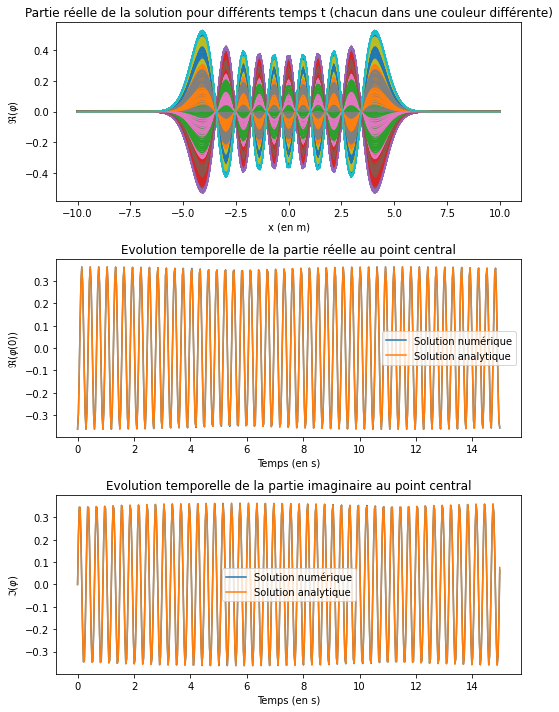

In [ ]:
##We create all needed objects to compute the eigenstates of the quantum oscillator hamiltonian
class Hermite:
    """Gaussian function"""
    def __init__(self, order):
        """Create Gaussian with the given width and amplitude, centered at x = x0"""
        self.n = order
        
    def __call__(self, x):
        """Evaluate the function for the values of x"""
        if self.n == 0 : 
            return 1
        elif self.n == 1 :
            return 2*x
        return 2*x*Hermite(self.n - 1)(x) - 2*(self.n-1)*Hermite(self.n -2)(x)

def factorial(n):
    if n < 2:
        return 1
    else:
        return n * factorial(n-1)
    
class EigenState:
    #in equation m*wosc/hbar = parameter
    def __init__(self,order,parameter):
        self.n = int(order)
        self.om = abs(parameter)
        
    def __call__(self,x):
        return (pow(self.om/np.pi,1/4)*Hermite(self.n)(np.sqrt(self.om)*x)*np.exp(-self.om*(x**2)/2))/np.sqrt(2**self.n*factorial(self.n))


##TEST    
w = 1           # Valeur de w dans l'equation, nécessairement positive
N = 0        # Valeur de N dans l'equation
Nx = 200      # Nombre de pas de x
L = 10        # x_max; dx = 2L/Nx
Nt = 10      # Nombre de pas de temps
dt = 0.003         # Intervalle de temp; T = Nt * dt
NT = 500         #Nombre de pas de T
eigen = EigenState(order,np.sqrt(w))
GPE = GPE1D(Nx,N,L,w)
GPE.initialize(eigen)
x = GPE.x

realpart,imaginary=[],[]
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(8,10))
for i in range(NT):
    realpart.append(GPE.u[Nx//2].real)
    imaginary.append(GPE.u[Nx//2].imag)
    ax1.set_ylabel(r'$\Re(\varphi)$')
    ax1.set_xlabel('x (en m)')
    ax1.set_title('Partie réelle de la solution pour différents temps t (chacun dans une couleur différente)')
    ax1.plot(x,GPE.u.real)
    advance(GPE,dt,Nt)
t = [Nt*dt*i for i in range(len(realpart))]
ax2.plot(t,realpart,label="Solution numérique")
ax2.plot(t, realpart[0]*np.cos(-2*np.sqrt(w)*(order+1/2)*np.array(t)),label="Solution analytique")
ax2.set_xlabel('Temps (en s)')
ax2.set_title('Evolution temporelle de la partie réelle au point central')
ax2.set_ylabel(r'$\Re(\varphi(0))$')
ax2.legend()

ax3.plot(t,list(np.array(imaginary)),label="Solution numérique")
ax3.plot(t, realpart[0]*np.sin(-2*np.sqrt(w)*(order+1/2)*np.array(t)),label="Solution analytique")
ax3.set_xlabel('Temps (en s)')
ax3.set_title('Evolution temporelle de la partie imaginaire au point central')
ax3.set_ylabel(r'$\Im(\varphi)$')
ax3.legend()
plt.tight_layout()

Encore une fois, le programme GPE1D donne un résultat numérique en accord avec la théorie.

**Notre programme passe les tests de l'étalement du paquet d'onde gaussien et de l'oscillateur harmonique quantique.**

Nous allons maintenant procéder à la recherche de solutions solitons pour la nonlinear Schrodinger equation (NLSE) en utilisant la méthode de temps imaginaire. Pour rappel, le soliton est un état stable de notre Hamiltonien NLSE : 
 $$
H = \left[-\frac{\partial^2}{\partial x^2}+\mathcal{N}|\varphi(x ; t)|^2\right]  
$$
Dans l'espace de Hilbert, dans la base propre de $\widehat{H}$, pour une fonction d'onde quelconque, on a à chaque instant : 
$$ |\varphi(t)\rangle = \sum_{n}c_n(t)e^{-iE_nt/\hbar}|n\rangle$$
Le passage en temps imaginaire $\tilde{t} = it$ permet d'écrire : 
$$ |\varphi(\tilde{t})\rangle = \sum_{n}c_n(t)e^{-E_n\tilde{t}/\hbar}|n\rangle$$

On observe que l'énergie propre régit le taux de désintégration. L'énergie la plus basse, c'est-à-dire l'état fondamental du système, se désintègre le plus lentement. À partir de fonction d'onde d'essai qui devrait idéalement être une estimation de la solution finale, par une propagation de l'équation GPE en temps imaginaire, la fonction d'onde tend vers l'état fondamental du système. Cet état fondamental est un soliton gris ou noir selon la valeur de $\mathcal{N}$. Ainsi, en théorie, on peut obtenir à partir d'un état quelconque un soliton en propageant l'équation NLSE en temps imaginaire. 

Cependant, comme nous l'avons vu au cours de nos études numériques, la convergence vers le soliton est plutôt sensible à la proximité de la fonction d'onde initial avec le soliton cherché. Nous avons donc choisi d'entrer comme condition initiale la solution analytique 1D pour les solitons de vitesse nulle dans un milieu infini : 
$$\varphi_{gris} = \frac{\varphi_0}{ch(x/x_0)} \\
\varphi_{noir} = \varphi_0th(x/x_0)$$
Comme nous travaillons ici dans un milieu confiné, nous utiliserons tout de même la propagation en temps imaginaire pour trouver le bon soliton. 

Selon Parker, un soliton confiné dans un potentiel harmonique oscille avec une fréquence $\omega_0 \propto \sqrt{\omega}$ la fréquence du potentiel harmonique par rapport à sa position initiale. 
L'étude du soliton confiné nécessite d'imposer la condition aux bords $\lim_{x\to-L,L}\varphi(x,t) = 0$. Comme la solution analytique du soliton gris vérifie déjà cette condition, nous avons choisi de commencer par vérifier l'oscillation de ce dernier dans le potentiel harmonique. 

Nous voulons d'abord vérifier que toutes les fonctions d'onde initiales assez proches de la solution convergent bien vers un soliton final ne dépendant que des paramètres. Pour cela, ous commençons par trouver, à partir de gaussiennes de largeur $\omega1$, le soliton gris et vérifions la convergence commune. 

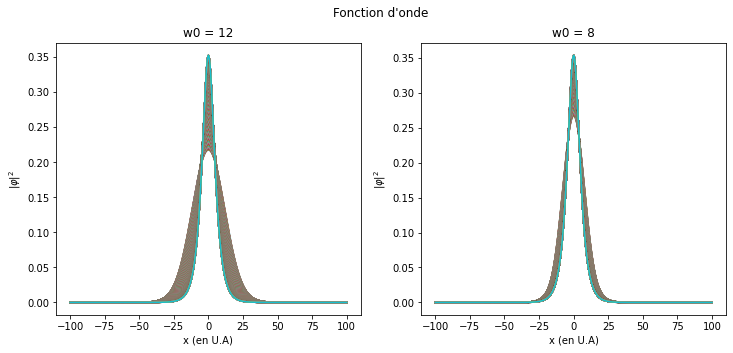

In [ ]:
# Find bright soliton solution by imaginary time method
w = 0           # Valeur de w dans l'equation
N = -1        # Valeur de N dans l'equation
Nx = 10000      # Nombre de pas de x
L = 100        # x_max; dx = L/Nx
Nt = 100      # Nombre de pas de temps
dt = 0.003         # Intervalle de temp
NT = 400    # Nombre de pas de T
r = 0     # temps imaginaire
# create a Gaussian object
w1 = 12
w2 = 8
k0 = 0
x0 = 0
gauss1 = Gaussian_packet(w1,k0,x0)
gauss2 = Gaussian_packet(w2,k0,x0)

# Create an GPE
GPE1 = GPE1D(Nx,N,L,w,r) 
GPE1.initialize(gauss1)
GPE2 = GPE1D(Nx,N,L,w,r)
GPE2.initialize(gauss2)

# Différence entre deux fonctions consécutives
dif1 = np.zeros(NT+1)
dif2 = np.zeros(NT+1)

# Set x, T, dT
x = GPE1.x
T,dT = np.linspace(0,NT*dt*Nt,NT+1,endpoint = True, retstep = True)


# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle("Fonction d'onde")
ax1.set_title("w0 = {}".format(w1))
ax1.set_xlabel(r"x (en U.A)")
ax1.set_ylabel(r"$|\varphi|^2$")
ax2.set_xlabel(r"x (en U.A)")
ax2.set_ylabel(r"$|\varphi|^2$")
ax2.set_title("w0 = {}".format(w2))

for i in range(NT):
    u1 = GPE1.u 
    u2 = GPE2.u
    advance(GPE1,dt,Nt)
    advance(GPE2,dt,Nt)
    ax1.plot(GPE1.x, np.abs(GPE1.u))
    ax2.plot(GPE2.x, np.abs(GPE2.u))
    dif1[i] = np.linalg.norm(GPE1.u-u1)
    dif2[i] = np.linalg.norm(GPE2.u-u2)

Le soliton final pour les deux figures est tracé en bleu. Nous vérifions la convergence vers celui-ci en distance euclidienne ci-dessous.

Text(0.5, 1.0, 'w1 = 8')

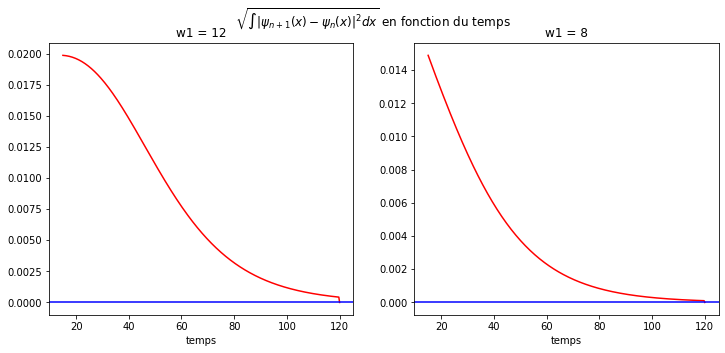

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5) )
fig.suptitle("$\sqrt{\int |\psi_{n+1}(x) - \psi_{n}(x) |^2 dx}$ en fonction du temps")

ax1.plot(T[50:],dif1[50:],"red")
ax1.axhline(y=0, color='blue')
ax1.set_xlabel("temps")
ax1.set_title("w1 = {}".format(w1))

ax2.plot(T[50:],dif2[50:],"red")
ax2.axhline(y=0, color='blue')
ax2.set_xlabel("temps")
ax2.set_title("w1 = {}".format(w2))

plt.show()


Nous avons vérifié la convergence euclidienne. Maintenant, nous voulons prouver notre assertion initiale : le soliton solution ne dépend pas de la fonction d'onde initiale propagée en temps imaginaire. Nous trouvons même un résultat qui peut paraitre logique : la solution en milieu confiné est de la même forme que la solution classique, pour des paramètres $\varphi_0$ et $x_0$ particuliers. Pour le soliton gris, nous verrons que la condition limite $\lim_{x\to-L,L}\varphi(x,t) = 0$ entraine une différence entre la solution soliton confinée et la solution "libre".

 	  Courbe fitée : psi_0 = 0.352 et x0 = 4.025


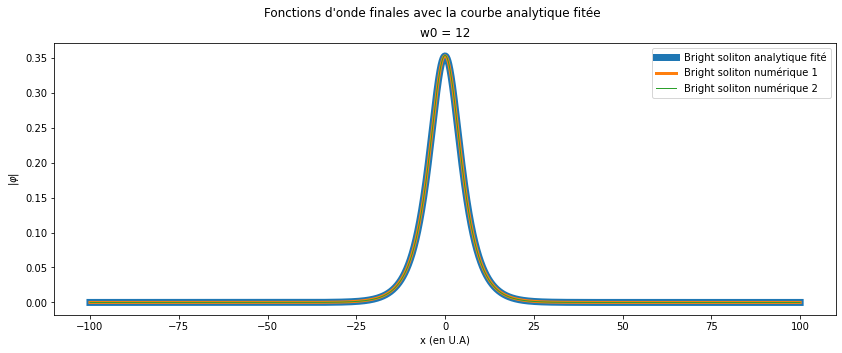

In [ ]:
from scipy.optimize import curve_fit

def Bright_Soliton(x,phi0,x0):
    """Définir le bright soliton solution """
    return phi0/np.cosh(x/x0)

popt1, pcov1 = curve_fit(Bright_Soliton, GPE1.x, np.abs(GPE1.u))

fig, ax1 = plt.subplots(1, 1,figsize=(14, 5))
fig.suptitle("Fonctions d'onde finales avec la courbe analytique fitée")

ax1.plot(GPE1.x, Bright_Soliton(GPE1.x, *popt1), lw = 7 , label = "Bright soliton analytique fité")
ax1.plot(GPE1.x, np.abs(GPE1.u),lw = 3 , label = "Bright soliton numérique 1")
ax1.plot(GPE1.x, np.abs(GPE2.u),lw = 1 , label = "Bright soliton numérique 2")
ax1.set_xlabel("x (en U.A)")
ax1.set_ylabel(r"$|\varphi|$")
ax1.legend()
ax1.set_title("w0 = {}".format(w1))

print(" \t \033[1m Courbe fitée : psi_0 = {:.3f} et x0 = {:.3f}".format(*popt1))

Essayons maintenant d'insérer notre soliton gris dans un potentiel harmonique pour voir comment il évolue : 

110


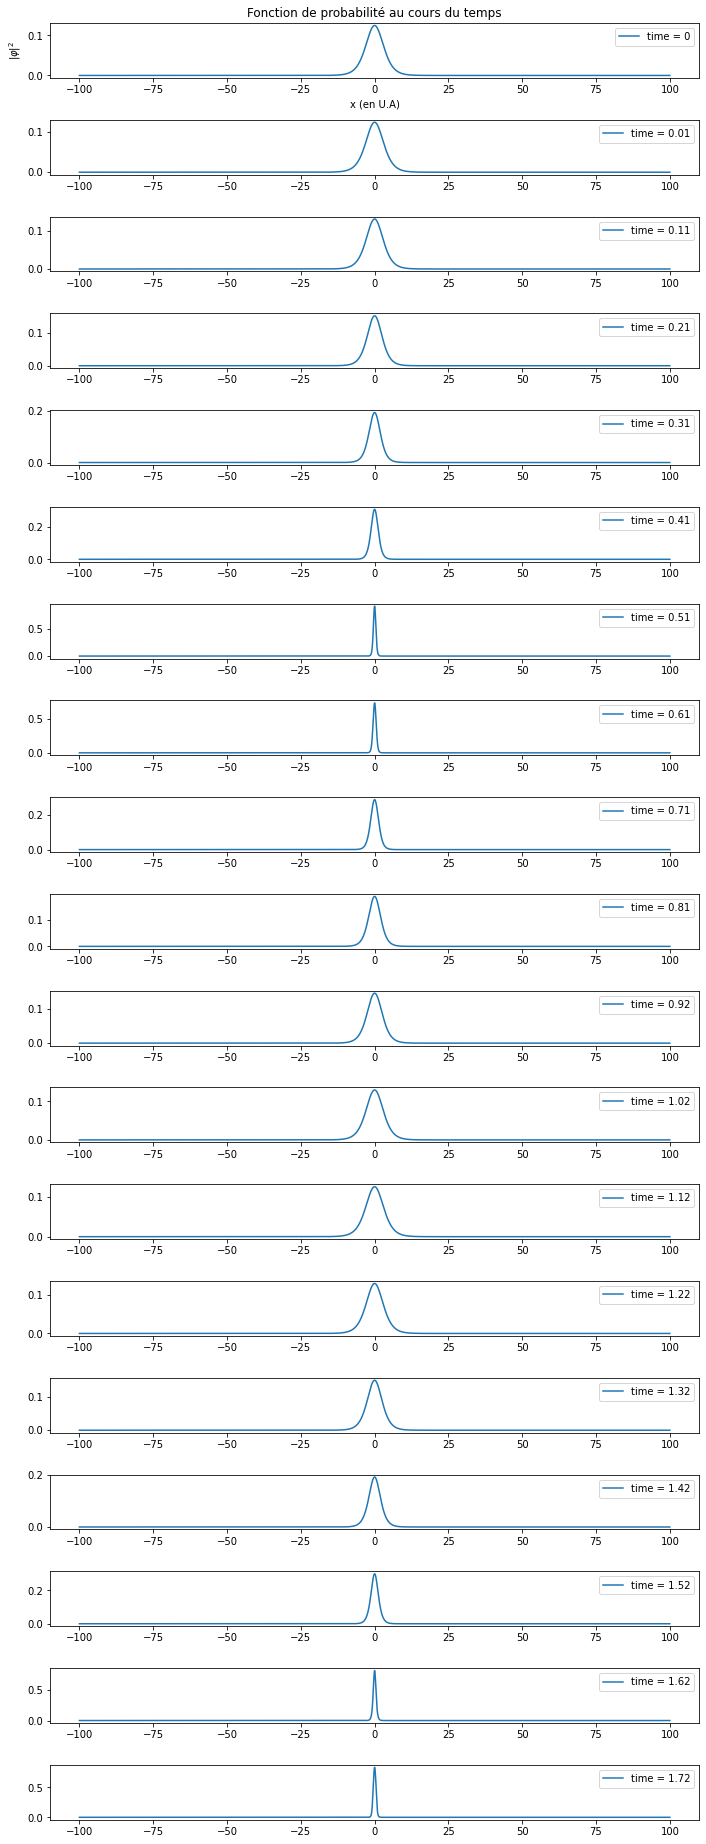

In [ ]:
# Bright soliton oscillates in harmonic potential
w = 2        # Valeur de w dans l'equation
Nt = 10      # Nombre de pas de temps
dt = 0.001         # Intervalle de temp
NT = 180    # Nombre de pas de T
r = 1    # temps réel

T,dT = np.linspace(0,NT*dt*Nt,NT,endpoint = True, retstep = True)
GPE3 = GPE1D(Nx,N,L,w,r) 
GPE3.initialize_vector(GPE2.u) # mettre le bright soliton de la dernière simulation comme la fonction initiale

u2 = abs(GPE3.u)**2
dif3 = np.zeros(NT)

# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
fig, ax = plt.subplots((NT)//10+1,figsize=(10, NT/7))
ax[0].plot(GPE3.x, np.abs(GPE3.u)**2, label = "time = 0")
ax[0].set_xlabel(r"x (en U.A)")
ax[0].set_ylabel(r"$|\varphi|^2$")
ax[0].set_title("Fonction de probabilité au cours du temps")
ax[0].legend()
# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
for i in range(NT):
    advance(GPE3,dt,Nt)
    dif3[i] = np.linalg.norm(abs(GPE3.u)**2 - u2)
    if i%10 == 0:
        ax[i//10+1].plot(GPE3.x, abs(GPE3.u)**2, label = "time = {:.2f}".format(T[i+1]))
        ax[i//10+1].legend()

plt.tight_layout()

l = min(dif3)
indexx = list(dif3).index(l)
print(indexx)

Nous retrouvons le résultat théorique : le soliton oscille dans un potentiel harmonique. On peut également tracer la distance L2 avec la fonction d'onde intiale au cours du temps pour comprendre le mouvement du soliton.

Nous trouvons la fréquence d'oscillation en mesurant la période simplement par une recherche du minimum de $dif(N) = |||\varphi(t=0,.)|^2 - |\varphi(t=N*Nt*dt,.)|^2||$. Nous vérifions ensuite en faisant varier le paramètre $\omega$ la relation $\omega_0 \propto \sqrt{\omega}$


Text(0.5, 1.0, '$\\sqrt{\\int ||\\varphi_{n+1}(x)|^2 - |\\varphi_{0}(x)|^2 |^2 dx}$ en fonction du temps')

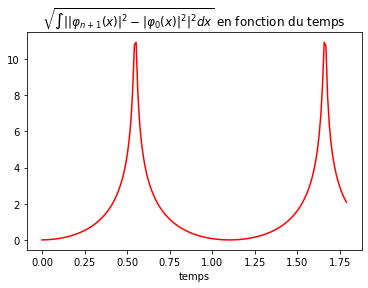

In [ ]:
plt.plot(T[:-1],dif3[:-1],"red")
plt.xlabel("temps")
#plt.ylim([-0,0.5])
plt.title(r"$\sqrt{\int ||\varphi_{n+1}(x)|^2 - |\varphi_{0}(x)|^2 |^2 dx}$ en fonction du temps")
plt.show()

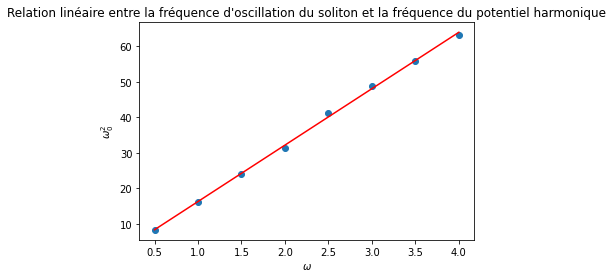

In [ ]:
w_harmonique = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
T_soliton =  np.array([2.18, 1.56, 1.28, 1.12, 0.98, 0.90, 0.84, 0.79 ])

def Linear(x,a,b):
    return a*x+b
popt, pcov = curve_fit(Linear, w_harmonique, (2*np.pi/T_soliton)**2)

plt.scatter(w_harmonique, (2*np.pi/T_soliton)**2)
plt.plot(w_harmonique, Linear(w_harmonique,*popt), "red")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\omega_0^2$")
plt.title("Relation linéaire entre la fréquence d'oscillation du soliton et la fréquence du potentiel harmonique")
plt.show()

Nous allons procéder de la même manière pour le soliton noir : comme nous l'avons prévu, la propagation de la solution analytique en temps imaginaire dans NLSE va modifier la fonction d'onde pour s'adapter à la condition aux bords.

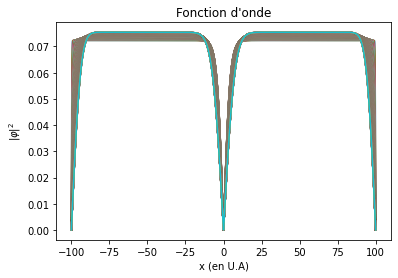

In [ ]:
# Find dark soliton by imaginary time method
w4 = 0           # Sans potentiel harmonique
N = 1        # Valeur de N dans l'equation
Nx = 20000      # Nombre de pas de x
L = 100        # x_max; dx = L/Nx
Nt = 10      # Nombre de pas de temps
dt = 0.003         # Intervalle de temp
NT = 400    # Nombre de pas de T
r4 = 0    # temps imaginaire


def Dark_Soliton(x, phi0, x0):
    return phi0* np.tanh(x/x0)  

phi0 = 0.35
x0 = 4
GPE4 = GPE1D(Nx,N,L,w4,r4) 
GPE4.initialize_vector(Dark_Soliton(GPE4.x, phi0, x0))

T,dT = np.linspace(0,NT*dt*Nt,NT+1,endpoint = True, retstep = True)
# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
dif = np.zeros(NT+1)
for i in range(NT):
    u = GPE4.u
    advance(GPE4,dt,Nt)
    dif[i] = np.linalg.norm(GPE4.u-u)
    plt.title("Fonction d'onde")
    plt.xlabel("x (en U.A)")
    plt.ylabel(r"$|\varphi|^2$")
    plt.plot(GPE4.x, np.abs(GPE4.u))

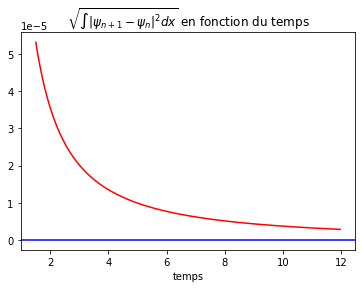

In [ ]:
plt.plot(T[50:-1],dif[50:-1]**2,"red")
plt.axhline(y=0, color='blue')
plt.xlabel("temps")
plt.title("$\sqrt{\int |\psi_{n+1} - \psi_{n} |^2 dx}$ en fonction du temps")
plt.show()

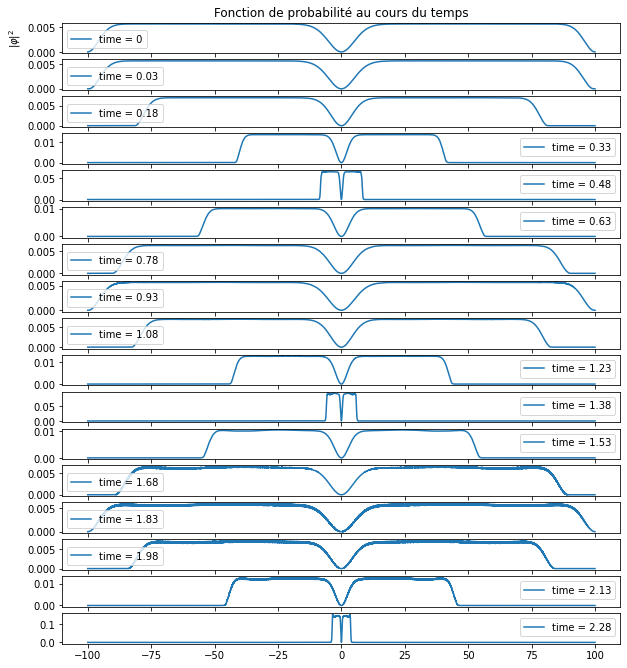

In [ ]:
# Dark soliton oscillates in harmonic potential
w5 = 3 #avec potentiel harmonique
r5 = 1 #temps réel
NT = 80

T,dT = np.linspace(0,NT*dt*Nt,NT+1,endpoint = True, retstep = True)
dark = GPE4.u
GPE5 = GPE1D(Nx,N,L,w5,r5) 
GPE5.initialize_vector(dark)

# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
fig, ax = plt.subplots((NT)//5+1,figsize=(10, NT/7))
ax[0].plot(GPE5.x, abs(GPE5.u)**2,label = "time = 0")
ax[0].set_title("Fonction de probabilité au cours du temps")
ax[0].set_xlabel(r"x (en U.A)")
ax[0].set_ylabel(r"$|\varphi|^2$")
ax[0].legend()

# Evolve the wave function in time, we get the value of wave function each T(s) for NT times
dif5 = np.zeros(NT+1)
u2 = abs(GPE5.u)**2
for i in range(NT):
    advance(GPE5,dt,Nt)
    dif5[i] = np.linalg.norm(abs(GPE5.u)**2 - u2)
    if i%5 == 0:
        ax[i//5+1].plot(GPE5.x,abs(GPE5.u)**2, label = "time = {:.2f}".format(T[i+1]))
        ax[i//5+1].legend()
plt.tight_layout()

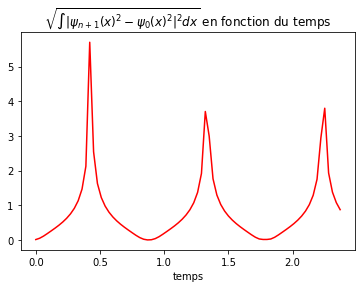

In [ ]:
plt.plot(T[0:-1],dif5[:-1],"red")
plt.xlabel("temps")
#plt.ylim([-0,12])
plt.title("$\sqrt{\int |\psi_{n+1}(x)^2 - \psi_{0}(x)^2 |^2 dx}$ en fonction du temps")
plt.show()

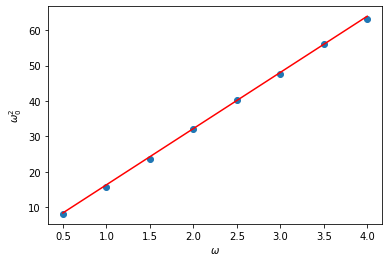

In [ ]:
w_harmonique = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
T_soliton =  np.array([2.21, 1.58, 1.29, 1.11, 0.99, 0.91, 0.84, 0.79])
                       

plt.scatter(w_harmonique, (2*np.pi/T_soliton)**2)
plt.plot(w_harmonique, Linear(w_harmonique,*popt), "red")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\omega_0^2$")
plt.show()


Comme pour le soliton gris, nous avons vérifié avec succès l'oscillation du soliton dans un potentiel harmonique, avec une fréquence $\omega_0 \propto \omega$ la fréquence du potentiel harmonique.

##**Conclusion**

Dans ce projet, nous décrivons une méthode à étapes fractionnées pour la solution numérique de l'équation de Gross-Pitaevskii non linéaire dépendante du temps sous l'action d'un piège harmonique 1D utilisant la propagation en temps réel et imaginaire. La propagation temporelle est effectuée avec une entrée initiale. L'hamiltonien complet est divisé en plusieurs parties dérivées spatiales et une partie non dérivée. Les parties dérivées spatiales sont traitées par la méthode du spectre. Différentes parties spatiales dérivées et non dérivées sont traitées dans des étapes indépendantes. Cette méthode, dite à étapes fractionnées, conduit à des résultats très stables et précis.

Nous avons considéré deux types d'itérations temporelles - la propagation en temps réel et la propagation en temps imaginaire. 
Dans la propagation en temps imaginaire, la variable de temps est remplacée par i $(=\sqrt{-1})$ fois une nouvelle variable de temps, par conséquent le GPE devient réelle. La solution numérique de cette équation ne peut plus donner la solution de problèmes non stationnaires ; mais donne une solution très précise des problèmes d'état fondamental stationnaire uniquement.Dans la propagation en temps réel, l'évolution temporelle est effectuée avec l'équation complexe d'origine. L'algorithme numérique dans ce cas nécessite l'utilisation d'une variable complexe mais produit une solution de problèmes non stationnaires. 

Nous fournissons l'algorithme numérique en détail en 1D propagations en temps réel et imaginaire. Nous étudions l'évolution de solitons (les solutions fondamentales de NLSE) au cours du temps. En effet, nous utilisons la méthode de temps imaginaire pour trouver les solitons, i.e les états fondamentaux de NLSE. Puis, nous mettons les solitons au milieu du potentiel harmonique et vérifions que les solitons oscillent avec la fréquence proportionnel à celle du potentiel harmonique

##**Références**
P.Muruganandam, S.K. Adhikari.  (2009,22 Avril). Fortran programs for the time-dependent Gross- Pitaevskii equation in a fully anisotropic trap. Computer Physics Commnunications

Nicholas Parker. (2004, Octobre). Numerical Studies of Vortices and Dark Solitons in Atomic Bose-Einstein Condensates. University of Durham